In [2]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
year = 2022
url = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022"
table_list = pd.read_html(url)
url1 = f"https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023"
table_list1 = pd.read_html(url1)

In [4]:
table1 = pd.DataFrame(data = table_list[0])
table2 = pd.DataFrame(data= table_list1[0])
df = pd.concat([table1,table2])

In [5]:
df.head()

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11


In [6]:
df.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '52 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2',
       '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '17 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2', '4 Mo'],axis=1).set_index('Date')

In [8]:
df

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-17,4.60,4.63,4.71,4.82,4.67,4.18,3.86,3.60,3.57,3.53,3.81,3.64
2023-01-18,4.59,4.62,4.69,4.79,4.63,4.06,3.72,3.43,3.40,3.37,3.65,3.54
2023-01-19,4.69,4.66,4.71,4.79,4.65,4.09,3.76,3.48,3.43,3.39,3.69,3.57


In [13]:
df2 = df.tail(5).T

Text(0.5, 1.0, 'Treasury Rate Curve')

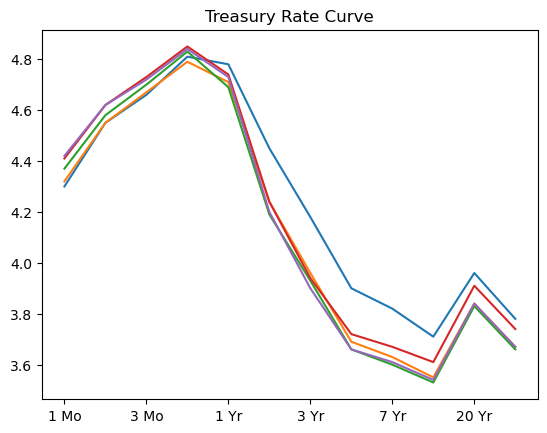

In [14]:
df2.plot(legend=None)
plt.title('Treasury Rate Curve')

In [18]:
# 2Y/FFR
df['2 Yr'].tail(5) - 4.50

Date
2023-01-04   -0.14
2023-01-05   -0.05
2023-01-06   -0.26
2023-01-09   -0.31
2023-01-10   -0.26
Name: 2 Yr, dtype: float64

Text(0.5, 1.0, '2022-23 Rates Correlations')

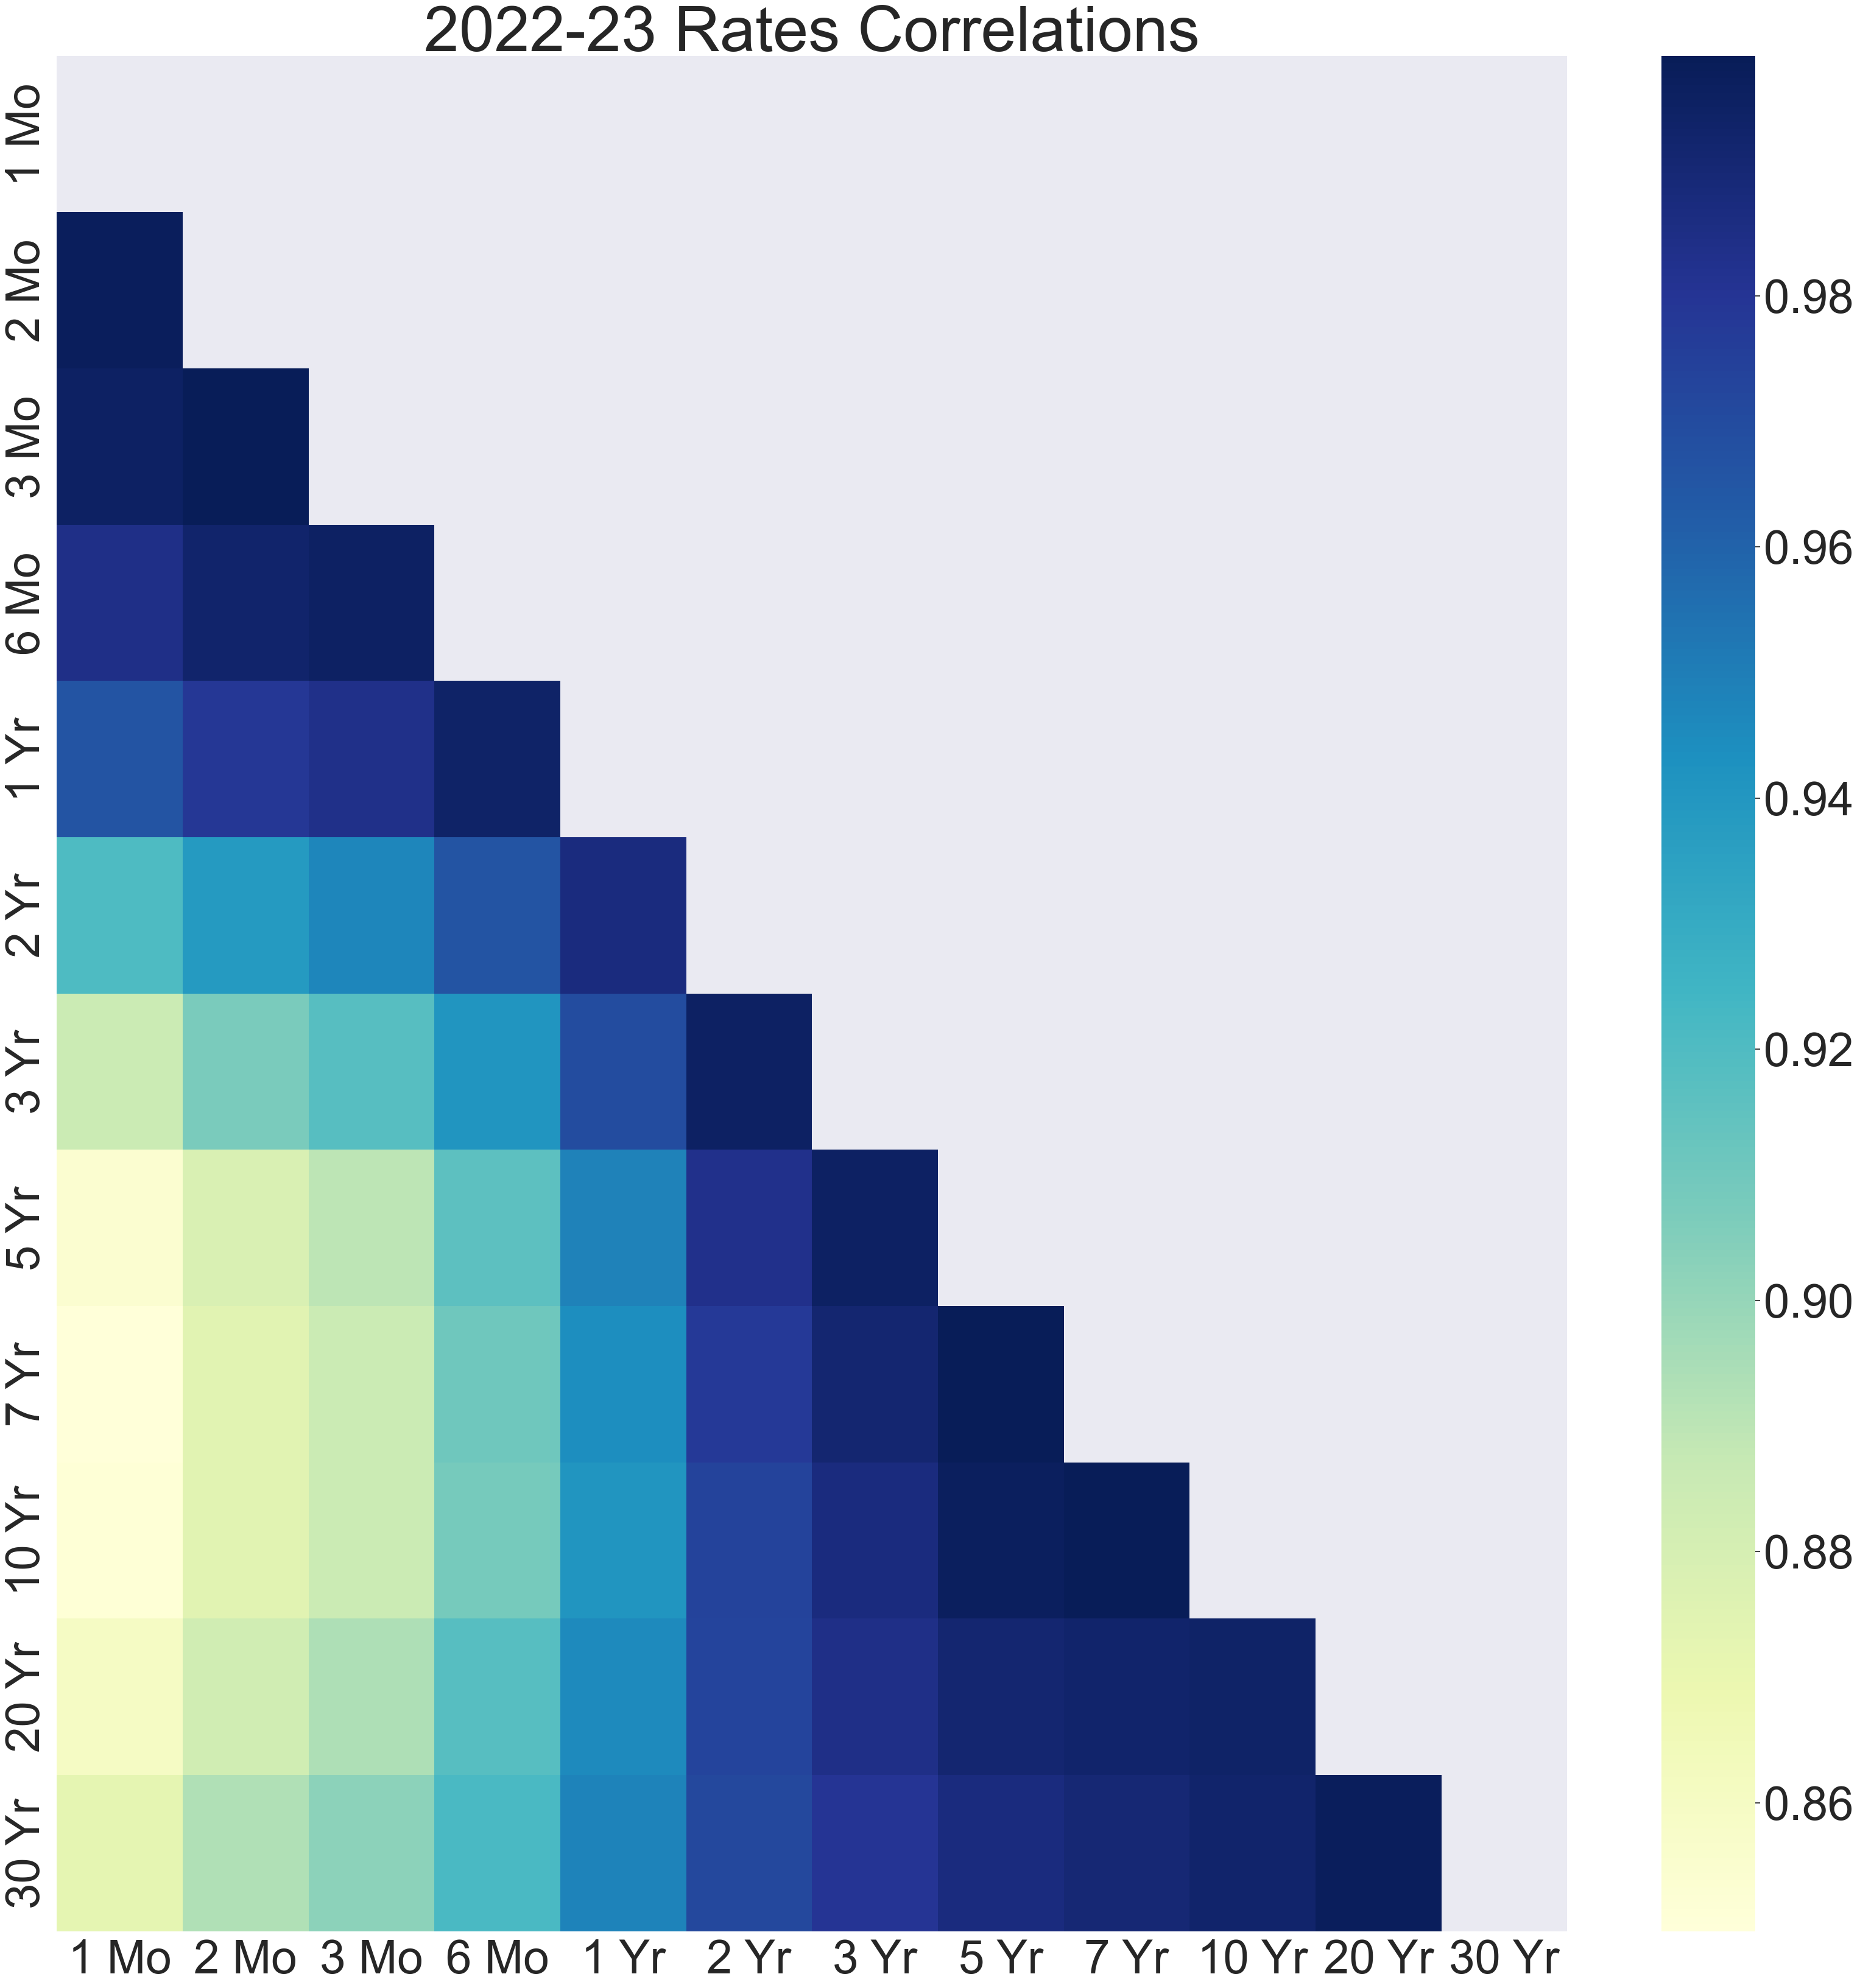

In [11]:
matrix = np.triu(df.corr())

plt.figure(figsize=(40,40))
sns.set(font_scale=5)
sns.heatmap(df.corr(), annot=False, mask=matrix, cmap="YlGnBu")
plt.title('2022-23 Rates Correlations', fontsize = 75)